In [3]:
import pandas as pd

In [4]:
ratings = pd.read_csv(r'filtered_ratings.csv')

In [5]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5.0,2000-12-31 22:12:40
1,1,661,3.0,2000-12-31 22:35:09
2,1,914,3.0,2000-12-31 22:32:48
3,1,3408,4.0,2000-12-31 22:04:35
4,1,2355,5.0,2001-01-06 23:38:11
...,...,...,...,...
997294,6040,1091,1.0,2000-04-26 02:35:41
997295,6040,1094,5.0,2000-04-25 23:21:27
997296,6040,562,5.0,2000-04-25 23:19:06
997297,6040,1096,4.0,2000-04-26 02:20:48


In [6]:
ratings.rename(columns={'Rating': 'rating'}, inplace=True)
ratings.rename(columns={'UserID': 'userId'}, inplace=True)
ratings.rename(columns={'MovieID': 'movieId'}, inplace=True)

In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997299 entries, 0 to 997298
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     997299 non-null  int64  
 1   movieId    997299 non-null  int64  
 2   rating     997299 non-null  float64
 3   Timestamp  997299 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 30.4+ MB


In [8]:
ratings['rating'] = ratings['rating'].apply(lambda x: 1 if x > 3.5 else 0)


In [9]:
ratings

,userId,movieId,rating,Timestamp
0,1,1193,1,2000-12-31 22:12:40
1,1,661,0,2000-12-31 22:35:09
2,1,914,0,2000-12-31 22:32:48
3,1,3408,1,2000-12-31 22:04:35
4,1,2355,1,2001-01-06 23:38:11
...,...,...,...,...
997294,6040,1091,0,2000-04-26 02:35:41
997295,6040,1094,1,2000-04-25 23:21:27
997296,6040,562,1,2000-04-25 23:19:06
997297,6040,1096,1,2000-04-26 02:20:48


In [10]:
value_counts = ratings['rating'].value_counts()
value_counts

rating
1    573370
0    423929
Name: count, dtype: int64

In [11]:
movies_metadata = pd.read_csv('movies_title_tag_basic_info.csv')


In [12]:
unique_movieId_list = list(ratings['movieId'].unique())
len(unique_movieId_list)

3626

In [13]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44475 entries, 0 to 44474
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  44475 non-null  int64 
 1   tmdbId   44475 non-null  int64 
 2   title    44475 non-null  object
 3   tags     44475 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.4+ MB


In [14]:
movies_metadata = movies_metadata[movies_metadata['movieId'].isin(unique_movieId_list)]
movies_metadata.reset_index(drop=True, inplace=True)
movies_metadata.drop(['tmdbId','title'], axis=1, inplace=True)


In [15]:
movies_metadata

,movieId,tags
0,1,"Led by Woody, Andy's toys live happily in his ..."
1,2,When siblings Judy and Peter discover an encha...
2,3,A family wedding reignites the ancient feud be...
3,4,"Cheated on, mistreated and stepped on, the wom..."
4,5,Just when George Banks has recovered from his ...
...,...,...
3596,3948,"Greg Focker is ready to marry his girlfriend, ..."
3597,3949,The hopes and dreams of four ambitious people ...
3598,3950,A group of recruits go through Advanced Infant...
3599,3951,Buddy Visalo (Michael Rispoli) is a factory wo...


In [16]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  3601 non-null   int64 
 1   tags     3601 non-null   object
dtypes: int64(1), object(1)
memory usage: 56.4+ KB


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(movies_metadata['tags'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
indices = pd.Series(movies_metadata.index, index=movies_metadata['movieId']).drop_duplicates()
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movies_metadata['movieId'].iloc[movie_indices]

In [18]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997299 entries, 0 to 997298
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     997299 non-null  int64 
 1   movieId    997299 non-null  int64 
 2   rating     997299 non-null  int64 
 3   Timestamp  997299 non-null  object
dtypes: int64(3), object(1)
memory usage: 30.4+ MB


In [19]:
ratings

,userId,movieId,rating,Timestamp
0,1,1193,1,2000-12-31 22:12:40
1,1,661,0,2000-12-31 22:35:09
2,1,914,0,2000-12-31 22:32:48
3,1,3408,1,2000-12-31 22:04:35
4,1,2355,1,2001-01-06 23:38:11
...,...,...,...,...
997294,6040,1091,0,2000-04-26 02:35:41
997295,6040,1094,1,2000-04-25 23:21:27
997296,6040,562,1,2000-04-25 23:19:06
997297,6040,1096,1,2000-04-26 02:20:48


## previous

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix



# Step 1: Create the TF-IDF matrix and compute cosine similarity
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_metadata['tags'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a reverse mapping of indices and movieId
indices = pd.Series(movies_metadata.index, index=movies_metadata['movieId']).drop_duplicates()

def get_recommendations(movieId, cosine_sim=cosine_sim):
    if movieId not in indices:
        return []
    idx = indices[movieId]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return movies_metadata['movieId'].iloc[movie_indices]

# Step 2: Integrate User Ratings
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')

# Function to get k-nearest neighbors based on item-item similarity
def get_k_nearest_neighbors(item_similarity_df, movie_id, k=10):
    if movie_id not in item_similarity_df.columns:
        return pd.Index([])
    sim_scores = item_similarity_df[movie_id]
    nearest_neighbors = sim_scores.sort_values(ascending=False).index[1:k+1]
    return nearest_neighbors

# Function to predict rating for a specific user and movie
def predict_rating(user_item_matrix, item_similarity_df, user_id, movie_id, k=10):
    nearest_neighbors = get_k_nearest_neighbors(item_similarity_df, movie_id, k)
    if ne# Assuming 'movies_metadata' is your DataFrame
# Print the values of two specific columns from the first row
movies_metadata.iloc[56][['bert_embedding']][0].shapearest_neighbors.empty:
        return 0
    neighbor_ratings = user_item_matrix.loc[user_id, nearest_neighbors]
    if neighbor_ratings.isna().all():
        return 0
    return Counter(neighbor_ratings.dropna()).most_common(1)[0][0]

# Compute the item similarity DataFrame using movie metadata
item_similarity_df = pd.DataFrame(cosine_sim, index=movies_metadata['movieId'], columns=movies_metadata['movieId'])

# Split the ratings data into training and testing sets
train_ratings = ratings.sample(frac=0.8, random_state=42)
test_ratings = ratings.drop(train_ratings.index)

# Evaluate at K=255
K = 255
y_true_all = []
y_pred_all = []

for index, row in test_ratings.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    y_true_all.append(row['rating'])
    y_pred_all.append(predict_rating(user_item_matrix, item_similarity_df, user_id, movie_id, k=K))

# Convert to integers
y_true_all = [int(val) for val in y_true_all]
y_pred_all = [int(val) for val in y_pred_all]

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true_all, y_pred_all))

print("Confusion Matrix:")
print(confusion_matrix(y_true_all, y_pred_all))


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.52      0.56     84449
           1       0.68      0.76      0.72    115011

    accuracy                           0.66    199460
   macro avg       0.65      0.64      0.64    199460
weighted avg       0.66      0.66      0.66    199460

Confusion Matrix:
[[43942 40507]
 [27196 87815]]


### BERT try

In [21]:
from tqdm import tqdm

import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix

/home/patel8m6/Desktop/python scripts/mldl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/home/patel8m6/Desktop/python scripts/mldl/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [23]:
def get_bert_embedding(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Compute BERT embeddings for each movie's tags with progress bar
bert_embeddings = []
for tag in tqdm(movies_metadata['tags'], desc="Computing BERT embeddings"):
    bert_embeddings.append(get_bert_embedding(tag, tokenizer, model))

movies_metadata['bert_embedding'] = bert_embeddings

Computing BERT embeddings: 100%|████████████| 3601/3601 [04:07<00:00, 14.56it/s]


In [24]:
# Assuming 'movies_metadata' is your DataFrame
# Print the values of two specific columns from the first row
movies_metadata.iloc[56][['bert_embedding']][0].shape

/tmp/ipykernel_443808/2364131439.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  movies_metadata.iloc[56][['bert_embedding']][0].shape


(768,)

In [26]:
# Compute cosine similarity between BERT embeddings
movie_embeddings = np.stack(movies_metadata['bert_embedding'].values)
cosine_sim = cosine_similarity(movie_embeddings, movie_embeddings)

In [27]:
# Create a reverse mapping of indices and movieId
indices = pd.Series(movies_metadata.index, index=movies_metadata['movieId']).drop_duplicates()

def get_recommendations(movieId, cosine_sim=cosine_sim):
    if movieId not in indices:
        return []
    idx = indices[movieId]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return movies_metadata['movieId'].iloc[movie_indices]

# Step 2: Integrate User Ratings
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')

# Function to get k-nearest neighbors based on item-item similarity
def get_k_nearest_neighbors(item_similarity_df, movie_id, k=10):
    if movie_id not in item_similarity_df.columns:
        return pd.Index([])
    sim_scores = item_similarity_df[movie_id]
    nearest_neighbors = sim_scores.sort_values(ascending=False).index[1:k+1]
    return nearest_neighbors

# Function to predict rating for a specific user and movie
def predict_rating(user_item_matrix, item_similarity_df, user_id, movie_id, k=10):
    nearest_neighbors = get_k_nearest_neighbors(item_similarity_df, movie_id, k)
    if nearest_neighbors.empty:
        return 0
    neighbor_ratings = user_item_matrix.loc[user_id, nearest_neighbors]
    if neighbor_ratings.isna().all():
        return 0
    return Counter(neighbor_ratings.dropna()).most_common(1)[0][0]

# Compute the item similarity DataFrame using BERT embeddings
item_similarity_df = pd.DataFrame(cosine_sim, index=movies_metadata['movieId'], columns=movies_metadata['movieId'])

# Split the ratings data into training and testing sets
train_ratings = ratings.sample(frac=0.8, random_state=42)
test_ratings = ratings.drop(train_ratings.index)

# Evaluate at K=255
K = 255
y_true_all = []
y_pred_all = []

for index, row in test_ratings.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    y_true_all.append(row['rating'])
    y_pred_all.append(predict_rating(user_item_matrix, item_similarity_df, user_id, movie_id, k=K))

# Convert to integers
y_true_all = [int(val) for val in y_true_all]
y_pred_all = [int(val) for val in y_pred_all]

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true_all, y_pred_all))

print("Confusion Matrix:")
print(confusion_matrix(y_true_all, y_pred_all))


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.52      0.57     84449
           1       0.68      0.76      0.72    115011

    accuracy                           0.66    199460
   macro avg       0.65      0.64      0.64    199460
weighted avg       0.66      0.66      0.66    199460

Confusion Matrix:
[[43943 40506]
 [27096 87915]]


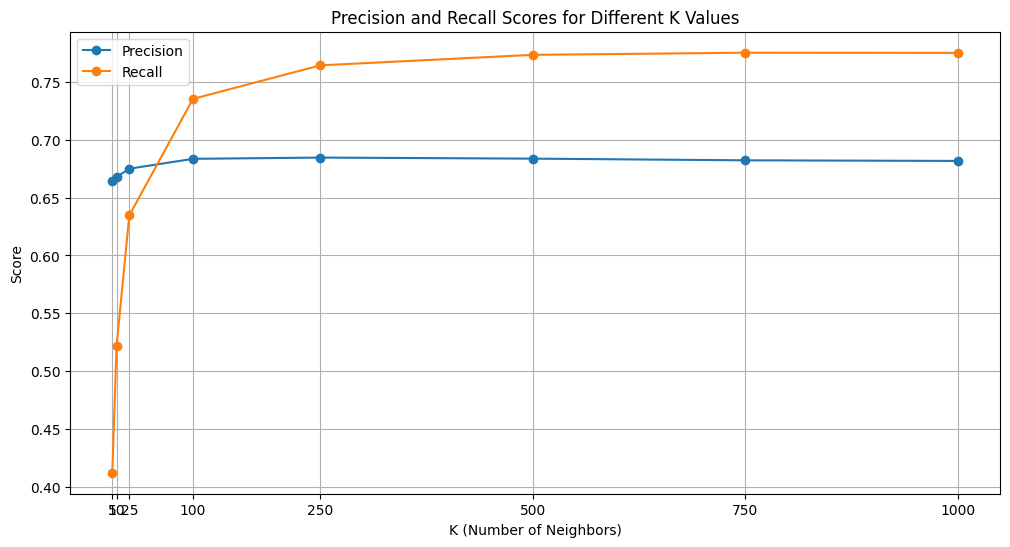

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score


# Define the list of K values
K_values = [5, 10, 25, 100, 250, 500, 750, 1000]

# Initialize lists to store precision and recall values for each K
precision_scores = []
recall_scores = []

for K in K_values:
    # Perform prediction and evaluation
    y_true_all = []
    y_pred_all = []

    for index, row in test_ratings.iterrows():
        user_id = row['userId']
        movie_id = row['movieId']
        y_true_all.append(row['rating'])
        y_pred_all.append(predict_rating(user_item_matrix, item_similarity_df, user_id, movie_id, k=K))

    # Convert to integers
    y_true_all = [int(val) for val in y_true_all]
    y_pred_all = [int(val) for val in y_pred_all]

    # Calculate precision and recall
    precision = precision_score(y_true_all, y_pred_all)
    recall = recall_score(y_true_all, y_pred_all)

    # Append scores to lists
    precision_scores.append(precision)
    recall_scores.append(recall)

# Plot the precision and recall scores for different values of K
plt.figure(figsize=(12, 6))
plt.plot(K_values, precision_scores, label='Precision', marker='o')
plt.plot(K_values, recall_scores, label='Recall', marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Score')
plt.title('Precision and Recall Scores for Different K Values')
plt.xticks(K_values)
plt.legend()
plt.grid(True)
plt.show()
